[3, 4, 5, 8, 6, 7, 0, 1, 2, 9]


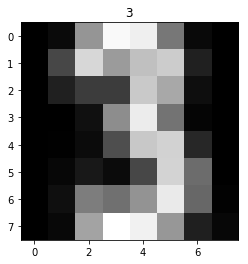

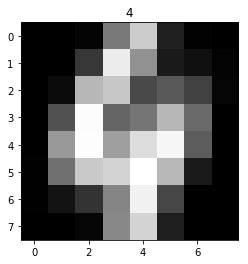

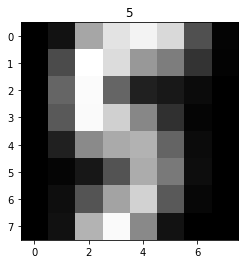

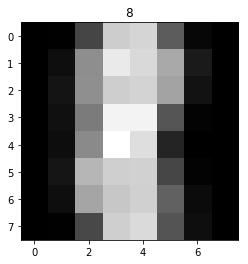

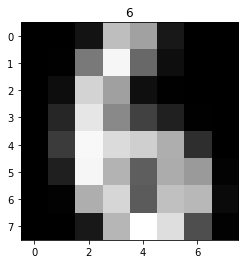

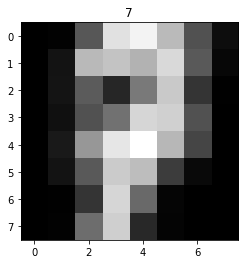

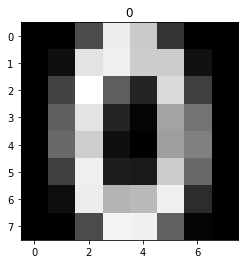

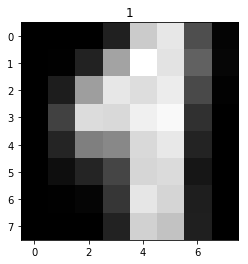

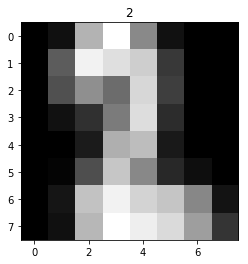

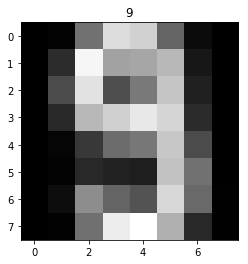

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

def plot_dig(i):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title('This is {}'.format(digits.target[i]))
    plt.show()
    
def get_labels(digits, centroids, k):
    dist = np.linalg.norm(digits-centroids[0], axis = 1).reshape(-1,1)
    for i in range(1,k):
        dist_i = np.linalg.norm(digits-centroids[i],axis=1).reshape(-1,1)
        dist = np.hstack([dist, dist_i])
    labels = np.argmin(dist,axis=1)
    return labels

def prev_digit(digits, labels, k):
    digs = []
    for i in range(k):
        mask = (labels == i)
        A = [digits.target[mask]]
        unique, pos = np.unique(A, return_inverse = True)
        counts = np.bincount(pos)
        maxpos = counts.argmax()   
        digs.append(unique[maxpos])
    return digs
#1
from sklearn.datasets import load_digits
digits = load_digits()
digits_64 = digits.images.reshape(digits.images.shape[0],64)

centroids, delta = kmeans(digits_64, 10)
labels = get_labels(digits_64, centroids, 10)

ass_digs = prev_digit(digits, labels, 10)
print(ass_digs)

for i in range(10):
    plt.imshow(centroids[i].reshape((8,8)), cmap='gray')
    plt.title(ass_digs[i])
    plt.show()

In [128]:
#2

def error_rate(k):
    q = 0
    for i in range(1797):
        if((digits.target[i] == k) and (digits.target[i] != ass_digs[labels[i]])):
                q += 1
    return q
for i in range(10):
    print("error rate for ", i, " =" , error_rate(i) / 1797)

error rate for  0  = 0.0005564830272676684
error rate for  1  = 0.07067334446299388
error rate for  2  = 0.016138007790762382
error rate for  3  = 0.016138007790762382
error rate for  4  = 0.01001669449081803
error rate for  5  = 0.025041736227045076
error rate for  6  = 0.0022259321090706734
error rate for  7  = 0.005008347245409015
error rate for  8  = 0.04062326099053979
error rate for  9  = 0.022815804117974403


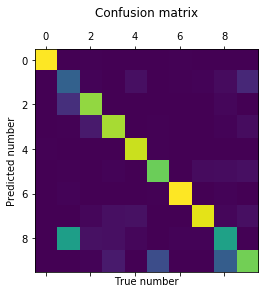

Conclusions: mostly 1, 8, 5, 9 are confused
 0, 6, 7 are better recognised


In [129]:
#3
def confusions(digits, labels, i, j):
    q = 0
    for k in range(1797):
        if (ass_digs[labels[k]] == i and digits.target[k] == j):
            q+=1
    return q

a=np.zeros((10,10))
for i in range(10):
    for j in range(10):
        a[i][j] = confusions(digits,labels,i,j)
        
plt.matshow(a)
plt.title("Confusion matrix\n")
plt.xlabel("True number")
plt.ylabel("Predicted number")
plt.show()
print("Conclusions: mostly 1, 8, 5, 9 are confused\n 0, 6, 7 are better recognised")

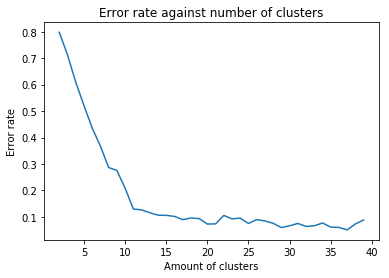

A proper k is 37, because the error rate is minimal.
 I think with increasing number of clusters the chance of a digit to be in a right cluster grows up
 But an optimal k is 18, because there is too many clusters for k=37 (all digits will have a lot of clusters)


In [131]:
#4

errors=[]
for k in range(2,40):
    sum_err = 0
    centroids, delta = kmeans(digits_64, k)
    labels = get_labels(digits_64, centroids, k)
    ass_digs = prev_digit(digits, labels, k)
    for i in range(10):
        sum_err += error_rate(i)
    errors.append(sum_err / 1797)
arr=np.arange(2,40)

plt.plot(arr,errors)
plt.title("Error rate against number of clusters")
plt.xlabel("Amount of clusters")
plt.ylabel("Error rate")
plt.show()

print("A proper k is 37, because the error rate is minimal.\n I think with increasing number of clusters the chance of a digit to be in a right cluster grows up\n But an optimal k is 18, because there is too many clusters for k=37 (all digits will have a lot of clusters)")

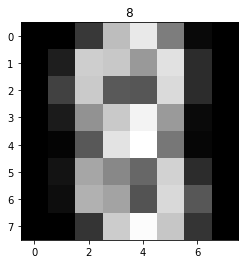

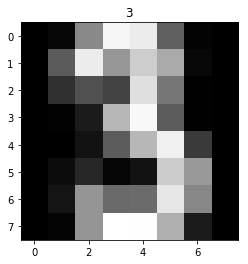

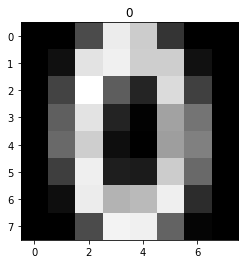

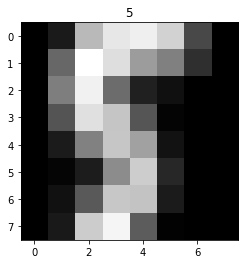

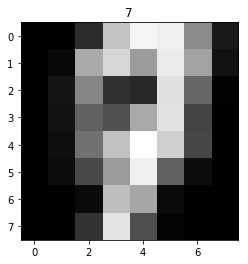

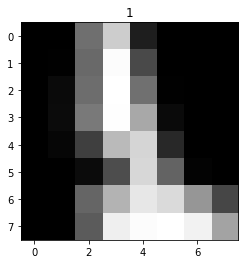

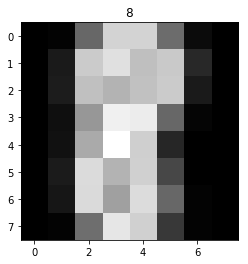

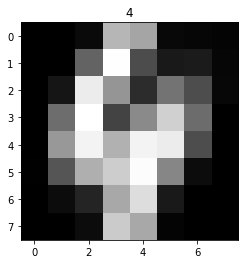

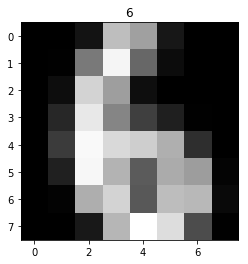

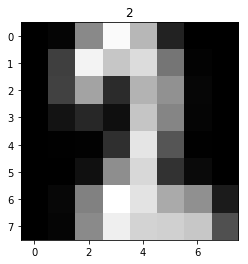

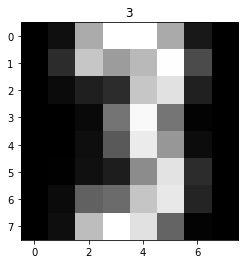

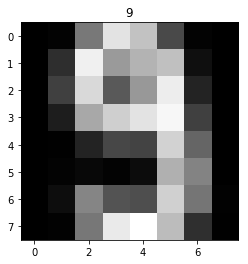

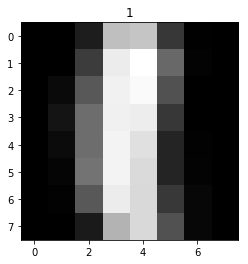

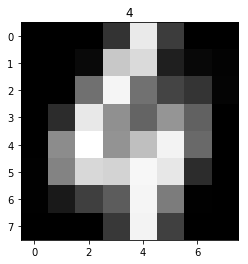

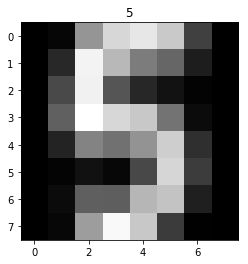

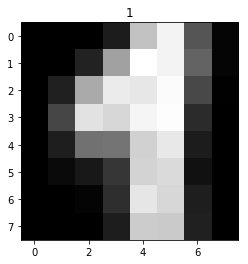

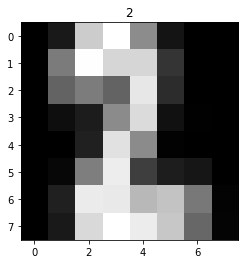

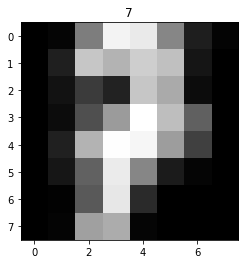

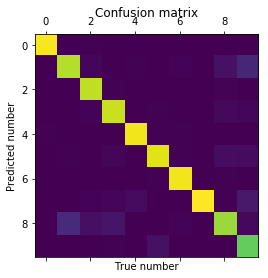

1, 2, 4, 5, 6, 7, 8 are in some clusters.
For 0,3,9 there is exactly one cluster. So we can conclude that this digits are the most noticeable.


In [130]:
#5
k = 18
centroids, delta = kmeans(digits_64, k)
labels = get_labels(digits_64, centroids, k)    
ass_digs = prev_digit(digits, labels, k)
for i in range(k):
    plt.imshow(centroids[i].reshape((8,8)), cmap='gray')
    plt.title(ass_digs[i])        
    plt.show()

a=np.zeros((10,10))
for i in range(10):
    for j in range(10):
        a[i][j] = confusions(digits,labels,i,j)
        
plt.matshow(a)
plt.title("Confusion matrix")
plt.xlabel("True number")
plt.ylabel("Predicted number")
plt.show()  

print("1, 2, 4, 5, 6, 7, 8 are in some clusters.\nFor 0,3,9 there is exactly one cluster. So we can conclude that this digits are the most noticeable.")